# Name - Abhishek Mohanlal Chauhan

# Task 2 - Stock Market Prediction and Forecasting Using Stacked LSTM

# Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Data Processing

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

In [7]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Plotting the graph of stocks at close

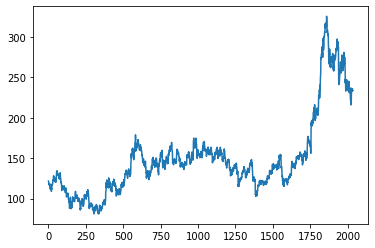

In [8]:
plt.plot(df['Close'])

In [9]:
df1 = df['Close']

# Feature Scaling

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Splitting the data into training and test sets

In [11]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [12]:
training_size, test_size

(1424, 611)

In [13]:
def datasetCrtd(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 14s 451ms/step - loss: 0.0130 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 7s 361ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 166ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 6s 344ms/step - loss: 8.7239e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 173ms/step - loss: 8.3625e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 177ms/step - loss: 8.1337e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 180ms/step - loss: 8.0110e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 184ms/step - loss: 7.7052e-04 - val_loss: 9.7833e-04
Epoch 9/60
19/19 [==============================] - 3s 174ms/step - loss: 7.6223e-04 - val_loss: 9.3039e-04
Epoch 10/60
19/19 [==============================] - 4s 195ms/step 

In [20]:
test_predict = model.predict(X_test)

In [21]:
test_predict1 = scaler.inverse_transform(test_predict)

In [22]:
test_predict1

array([[143.10933 ],
       [143.32635 ],
       [142.52655 ],
       [140.02504 ],
       [138.26857 ],
       [137.57565 ],
       [138.57799 ],
       [140.13014 ],
       [140.67606 ],
       [140.41779 ],
       [140.15962 ],
       [141.19162 ],
       [142.00171 ],
       [143.53827 ],
       [145.7058  ],
       [144.07861 ],
       [141.72375 ],
       [141.09174 ],
       [141.55235 ],
       [146.21841 ],
       [150.75009 ],
       [153.23087 ],
       [153.77448 ],
       [151.84518 ],
       [151.38707 ],
       [151.06067 ],
       [151.4076  ],
       [153.01874 ],
       [153.8653  ],
       [153.95186 ],
       [154.27705 ],
       [153.1876  ],
       [150.07985 ],
       [144.56844 ],
       [140.86469 ],
       [139.54756 ],
       [139.60696 ],
       [139.00883 ],
       [136.98457 ],
       [133.53168 ],
       [130.9143  ],
       [129.54256 ],
       [127.55233 ],
       [126.64823 ],
       [124.76874 ],
       [122.28404 ],
       [121.38569 ],
       [120.9

# Performance Metrices

# Mean Square Error

In [23]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict))

0.02799725972574154

# Conclusion : Hence, we can conclude that the mean squared error is low and is 0.02799725972574154